In [ ]:
from scenedetect import VideoManager, SceneManager
from scenedetect.detectors import ContentDetector

def detect_scenes(video_path, threshold=30):
    video_manager = VideoManager([video_path])
    scene_manager = SceneManager()
    scene_manager.add_detector(ContentDetector(threshold=threshold))

    video_manager.set_downscale_factor()
    video_manager.start()

    scene_manager.detect_scenes(frame_source=video_manager)
    scene_list = scene_manager.get_scene_list()

    return [(start.get_seconds(), end.get_seconds()) for start, end in scene_list]


In [ ]:
import concurrent.futures

def process_scene(scene_id, scene_path):
    result = {}

    # CLIP
    clip_detector = ClipSceneDetector(scene_path)
    clip_cuts, _, _ = clip_detector.detect_scenes()
    result["clip"] = clip_cuts

    # AUDIO
    audio_analyzer = AudioSceneAnalyzer(scene_path)
    audio_analyzer.extract_audio()
    audio_analyzer.load_models()
    audio_features, audio_timestamps = audio_analyzer.extract_panns_features()
    audio_cuts = audio_analyzer.detect_scenes(audio_features, audio_timestamps)
    result["audio"] = audio_cuts

    # TEXT
    segments = audio_analyzer.transcribe()
    text_segmenter = TopicSegmenter()
    text_cuts = text_segmenter.detect_topic_changes(segments)
    result["text"] = text_cuts

    return scene_id, result


In [2]:
import json

In [3]:
def get_short_segments(segments):
        return [
            {
                "start": round(seg["start"], 2),
                "end": round(seg["end"], 2),
                "text": seg["text"]
            }
            for seg in segments
        ]

In [4]:
with open('segments2_test.json', 'r', encoding='utf-8') as f:
        segments = json.load(f)
segments_short = get_short_segments(segments)

In [1]:
from VideoSceneDetector import VideoSceneDetector
from AudioSceneAnalyzer import AudioSceneAnalyzer
from TopicSegmenter import TopicSegmenter

video_path = "сваты_10мин.mp4"

/home/jessnou/kion_practice/v2/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from VideoSceneDetector import VideoSceneDetector
from AudioSceneAnalyzer import AudioSceneAnalyzer
from TopicSegmenter import TopicSegmenter

video_path = "сваты_10мин.mp4"
# # Визуально
# video_detector = VideoSceneDetector(video_path)
# video_cuts = video_detector.detect_scenes()

# # Аудио
# audio_analyzer = AudioSceneAnalyzer(video_path)
# audio_analyzer.extract_audio()
# audio_analyzer.load_models()
# features, timestamps = audio_analyzer.extract_openl3_features()
# audio_cuts = audio_analyzer.detect_scenes(features, timestamps)
# segments = audio_analyzer.transcribe()

# Топик
# topic_segmenter = TopicSegmenter('ai-forever/FRIDA')

# Итог
# final_cuts = merge_cuts(video_cuts, audio_cuts, topic_cuts)

# print(f"Итоговые границы сцен: {final_cuts}")


[PySceneDetect] PySceneDetect 0.6.6
[PySceneDetect] Detecting scenes...


  Detected: 60 | Progress:  98%|█████████▊| 14738/15001 [00:04<00:00, 3436.33frames/s]

[PySceneDetect] Processed 15001 frames in 4.5 seconds (average 3355.72 FPS).
[PySceneDetect] Detected 61 scenes, average shot length 9.8 seconds.
[PySceneDetect] Writing scene list to CSV file:
  ./сваты_10мин-Scenes.csv
[PySceneDetect] Scene List:
-----------------------------------------------------------------------
 | Scene # | Start Frame |  Start Time  |  End Frame  |   End Time   |
-----------------------------------------------------------------------
 |      1  |           1 | 00:00:00.000 |          28 | 00:00:01.120 |
 |      2  |          29 | 00:00:01.120 |         966 | 00:00:38.640 |
 |      3  |         967 | 00:00:38.640 |        1320 | 00:00:52.800 |
 |      4  |        1321 | 00:00:52.800 |        1705 | 00:01:08.200 |
 |      5  |        1706 | 00:01:08.200 |        1954 | 00:01:18.160 |
 |      6  |        1955 | 00:01:18.160 |        1982 | 00:01:19.280 |
 |      7  |        1983 | 00:01:19.280 |        2002 | 00:01:20.080 |
 |      8  |        2003 | 00:01:20.080

  Detected: 60 | Progress: 100%|██████████| 15001/15001 [00:04<00:00, 3360.91frames/s]


FileNotFoundError: [Errno 2] No such file or directory: 'video_scenes.csv'

INFO:TopicSegmenter:Обработка 87 сегментов...
INFO:TopicSegmenter:Вычисление эмбеддингов...
Batches: 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]
INFO:TopicSegmenter:Сравнение кумулятивных контекстов...
INFO:TopicSegmenter:Обнаружено 20 смен темы при пороге 0.5.


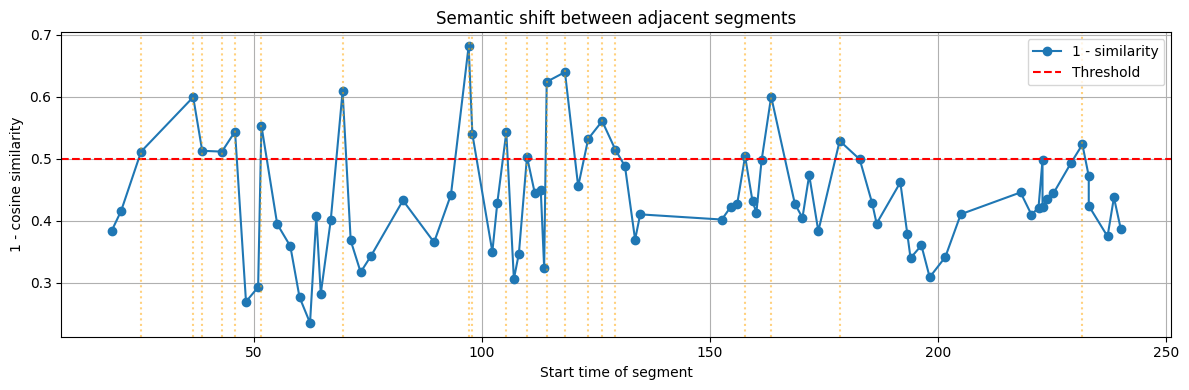

In [8]:
topic_cuts = topic_segmenter.detect_topic_changes_v2(segments, 0.5,3, True)

In [2]:
analyzer = AudioSceneAnalyzer(video_path)
    
print("🎧 Извлечение аудио...")
analyzer.extract_audio()

print("📊 Извлечение эмбеддингов PANNs...")
features, timestamps = analyzer.extract_panns_features(window_sec=1.0)

print("🔪 Поиск смысловых переходов...")
cuts, diffs, cut_timestamps = analyzer.detect_scenes(features, timestamps, sensitivity=0.85)

print(f"\n🔎 Найдено {len(cuts)} переходов:")
for t in cuts:
    print(f"— Сцена в {t:.2f} сек")

print("\n📝 Распознавание речи (опционально)...")
segments = analyzer.transcribe()
for seg in segments[:3]:  # покажем только первые 3
    print(f"[{seg['start']:.2f}s - {seg['end']:.2f}s]: {seg['text']}")


Checkpoint path: /home/jessnou/panns_data/Cnn14_mAP=0.431.pth
GPU number: 1
🎧 Извлечение аудио...
📊 Извлечение эмбеддингов PANNs...
🔪 Поиск смысловых переходов...

🔎 Найдено 90 переходов:
— Сцена в 9.00 сек
— Сцена в 27.00 сек
— Сцена в 28.00 сек
— Сцена в 29.00 сек
— Сцена в 39.00 сек
— Сцена в 44.00 сек
— Сцена в 45.00 сек
— Сцена в 49.00 сек
— Сцена в 76.00 сек
— Сцена в 84.00 сек
— Сцена в 98.00 сек
— Сцена в 110.00 сек
— Сцена в 137.00 сек
— Сцена в 138.00 сек
— Сцена в 140.00 сек
— Сцена в 141.00 сек
— Сцена в 142.00 сек
— Сцена в 166.00 сек
— Сцена в 169.00 сек
— Сцена в 190.00 сек
— Сцена в 192.00 сек
— Сцена в 199.00 сек
— Сцена в 204.00 сек
— Сцена в 206.00 сек
— Сцена в 210.00 сек
— Сцена в 211.00 сек
— Сцена в 212.00 сек
— Сцена в 213.00 сек
— Сцена в 214.00 сек
— Сцена в 215.00 сек
— Сцена в 217.00 сек
— Сцена в 218.00 сек
— Сцена в 219.00 сек
— Сцена в 220.00 сек
— Сцена в 222.00 сек
— Сцена в 225.00 сек
— Сцена в 226.00 сек
— Сцена в 227.00 сек
— Сцена в 231.00 сек
— Сце

Надо теперь подумать о том как все это совместить так как у меня и pyscenedetetor и ffmpeg 
Надо единый оптимизированный пайплайн где все будут работать паралелльно

Мои мысли такие что также разобьем через pyscenedetect 
Эти сцены будет гнать уже паралельно через эти анализаторы

То есть получилас сцена
Кинули в clip 
Кинули в audio
Кинули в whisper и дальше текст

Получается 3 процесса

Затем собрав все с агрегировать чтобы понять где какая сцена